In [1]:
# detector_construction.ipynb
# Authors: Stephan Meighen-Berger
# Example how to build a detector

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
# Hebe imports
from hebe import HEBE, config
from jax.config import config as jconfig

In [3]:
# Jax stuff
jconfig.update("jax_enable_x64", True)

In [4]:
# Here we are generating evenly spaced lines in a circle, e.g. KM3NeT
def sunflower(n, alpha=0, geodesic=False):
    points = []
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    angle_stride = 360 * phi if geodesic else 2 * np.pi / phi ** 2
    b = round(alpha * np.sqrt(n))  # number of boundary points
    for k in range(1, n + 1):
        r = radius(k, n, b)
        theta = k * angle_stride
        points.append((r * np.cos(theta), r * np.sin(theta)))
    return np.array(points)

def radius(k, n, b):
    if k > n - b:
        return 1.0
    else:
        return np.sqrt(k - 0.5) / np.sqrt(n - (b + 1) / 2)

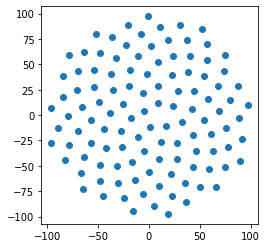

In [5]:
# Plotting points
fig, ax = plt.subplots()
points = sunflower(115, alpha=0.2, geodesic=False) * 100.
xs = [point[0] for point in points]
ys = [point[1] for point in points]
ax.scatter(xs, ys)
ax.set_aspect('equal') # display as square plot with equal axes
plt.show()

In [6]:
200 / 22

9.090909090909092

In [7]:
# Generating modules per line
# So inefficient
nz_list = []
dist_z_list = []
for line in points:
    nz_list.append(22)
    dist_z_list.append(9.09)
# Combined array
detector_specs = np.array([
    points[:, 0],
    points[:, 1],
    nz_list,
    dist_z_list
])
np.savetxt('../hebe/data/km3net_orca.txt', detector_specs)

In [8]:
# HEBE Config
config["general"]["random state seed"] = 1337
config["general"]["meta_name"] = 'meta_data_%d' % 1337
config['general']['clean up'] = False
config['lepton injector']['simulation']['output name'] = "./output/data_%d_output_LI.h5" % 1337
config['photon propagator']['storage location'] = './output/rset_%d_' % 1337
config['lepton injector']['simulation']['nevents'] = 10
config['lepton injector']['simulation']['minimal energy'] = 1e1
config['lepton injector']['simulation']['maximal energy'] = 1e2
config['lepton injector']['simulation']["injection radius"] = 150
config['lepton injector']['simulation']["endcap length"] = 200
config['lepton injector']['simulation']["cylinder radius"] = 150
config['lepton injector']['simulation']["cylinder height"] = 300
config['detector']['injection offset'] = [0., 0., 0]
config['photon propagator']['name'] = 'olympus'
config["detector"]['new detector'] = True
config["detector"]['detector specs file'] = '../hebe/data/km3net_orca.txt'
config["detector"]["file name"] = '../hebe/data/km3net_orca-f2k'
hebe = HEBE()

-------------------------------------------
Dumping config file
Finished dump
-------------------------------------------
-------------------------------------------
Setting up the detector
Starting up the detector handler
Building a new detector
Finished the detector
-------------------------------------------
Setting up leptopn propagation
Using proposal
The proposal version is 7.3.1
This assumes a homogeneous medium!
Using new setup
----------------------------------------------------
Setting up proposal
Finished setup
----------------------------------------------------
Finished the lepton propagator
-------------------------------------------
-------------------------------------------
Setting up photon propagation
--------------------------------------------
Constructing the photon propagator
Using olympus
Setting up the medium
Finished the medium
-------------------------------------------------------
Setting up the photon generator
Finished the photon generator
----------------

In [9]:
hebe.sim()

-------------------------------------------
Setting up and running LI
Injecting
Setting up the LI
Fetching parameters and setting paths
Setting the simulation parameters for the LI
Setting up the LI object
Setting injection parameters
Building the injection handler
Defining the earth model
Earth model location to use: /opt/LI/source/resources/earthparams/ With the model Planet
Planet earthparams/
Setting the seed
Defining the output location
Finished LI, loading data
Finished loading
Creating the data set for further propagation
Using the full data set
Finished the data set
Injection simulations took 0.056882 seconds
-------------------------------------------
-------------------------------------------
-------------------------------------------
-------------------------------------------
Starting particle loop
-------------------------------
Starting set
Creating Controller
Initializing Earth
Using... PREM... Standard Rock... 
Freezing ice
Executing Injectors
Starting up VolumeInject

 80%|████████  | 8/10 [01:38<00:20, 10.12s/it]